# Tensorflow Fundamentals
In this notebook, I'm going to cover the most fundamental concepts of tensors using TensorFlow

* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors & Numpy
* Using @tf.function (a way to speed up your regular Python functions)
* Using GPUs with TF (or TPUs)





## Introduction to tensors

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.13.0


In [ ]:
# create tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# Check the number of dimensions of a tensor (ndims stands for number of dimensions)
scalar.ndim

0

In [ ]:
# Create a vector
vector = tf.constant([10,10])

vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
# Check the dimension of the vector
vector.ndim

1

In [ ]:
# Create a matrix (has more than 1 dimension)
matrix = tf.constant([[10,7],
                      [7,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
# Check matriz dimension
matrix.ndim

2

In [ ]:
# Create another matrix
another_matrix = tf.constant([[10.,7.],
                              [3.,2.],
                              [8.,9.]], dtype= tf.float16)

another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
# Check the matrix number of dimensions
another_matrix.ndim

2

In [ ]:
# Create a tensor
tensor = tf.constant(
    [
        [
            [1,2,3],
            [4,5,6]
        ],
        [
            [7,8,9],
            [10,11,12]
        ],
        [
            [13,14,15],
            [16,17,18]
        ]
    ]
)

tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

What I have created so far:

* Scalar: A single number
* Vector: a number with direction (e.g. wind speed and direction)
* Matrix: a 2-dimensional array of numbers
* Tensor: an n-dimensional array of numbers (when n can be any number, a 0-dimensional tensor is a scalar, a 1-dimensional tensor is a vector)

### Creating tensors with `tf.variable`

In [ ]:
# create the same tensor with tf.Variable() as above

changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])

changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# Let's try change one of the elements in our changeable tensor
#changeable_tensor[0] = 7 # is not possible because to change values we must use the .assign()

In [ ]:
# Let's try change one of the elements using .assign()
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

🔑 **Note:** Rarely in practice will need it to decide whether to use `tf.constant` or `tf.Variable` to create tensors, as TensorFlow does it for you.

### Creating randon tensors

In [ ]:
# cerate 2 random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42) # set seed for reproducibility
random_1 = random_1.normal(shape=(3,2))

random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3,2))

# are equal?

random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

### Shuffle the order of elements in a tensor

In [ ]:
not_shuffled = tf.constant([[10,7],
                           [3,4],
                           [2,5]])

# shuffle our non-shuffled tensor
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

### Other ways to make tensors

In [ ]:
# create a tensor full of all ones
tf.ones([10,7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [ ]:
# Create a tensor full of all zeros
tf.zeros(shape=(3,4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Numpy arrays to tensors
The difference between Numpy arrays and Tensorflow tensors is that tensors can be run on a GPU

In [ ]:
import numpy as np

numpy_A = np.arange(1,25, dtype=np.int32) # Create a Numpy array between 1 and 25
numpy_A

# X = tf.constant(some_matrix) # capital letter for 'matrix' or tensor
# y = tf.constant(some_vector) # non-capital letter for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
A = tf.constant(numpy_A, shape=(2,3,4))
B = tf.constant(numpy_A)

A,B

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

### Getting informations for tensors
When dealing with tensros you probably want to be aware of the following attributes:

* Shape
* Rank
* Axis or dimension
* Size

In [ ]:
rank_4_tensor = tf.zeros(shape=[2,3,4,5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim,tf.size(rank_4_tensor)


(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
print('Size=120 --', 2*3*4*5)

Size=120 -- 120


In [ ]:
# Get various attributes of our tensor

print("DataType of every element:",rank_4_tensor.dtype)
print("Number of dimentions (rank):",rank_4_tensor.ndim)
print("Shape of tensor:",rank_4_tensor.shape)
print("Elements along the 0 axis:",rank_4_tensor.shape[0])
print("Elements along the last axis:",rank_4_tensor.shape[-1])
print("Total number of elements in our tensor:",tf.size(rank_4_tensor).numpy())

DataType of every element: <dtype: 'float32'>
Number of dimentions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along the 0 axis: 2
Elements along the last axis: 5
Total number of elements in our tensor: 120


## Indexing Tensors
Tensors can be indexed just like Python lists.

In [ ]:
# Get the first 2 elements of each dimension
rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
# Get the first elelemnt from each dimension from each index except fot the final one
rank_4_tensor[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10,7],
                             [3,4]])

rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [ ]:
# Get the last item of each of rwo of our rank 2 tensor
rank_2_tensor[:,-1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [ ]:
# Add in extra dimension to our rank 2 tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means expand the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
# Expand the 0-axis
tf.expand_dims(rank_2_tensor, axis=0) # expand the 0-axis

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

## Manipluating Tensors (tensor operations)
**Basic operations**

`+`,`-`,`*`,`/`

In [ ]:
# Adding values to a tensor (+)
tensor = tf.constant([[10,7],
                      [3,4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
# original tensor is unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
# Multiplication
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [ ]:
# Substraction
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [ ]:
# We can use the tensorflow built-in function too
tf.multiply(tensor,10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

## Matrix Multiplication
In ML matrix multiplication is one of the most common tensor operations.

There are 2 rules our tensors (or matrices) need to fulfill if we are going to matrix multiply them:

1. The inner dimensions must match
2. The resulting matrix has the shape of the OUTER dimensions

In [ ]:
# Matrix multiplication
tf.matmul(tensor,tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
# Matrix mu;tiplication with Python operator "@"
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
# cretae a tensor (3,2) tensor

X = tf.constant([[1,2],
                 [3,4],
                 [5,6]])

Y = tf.constant([[7,8],
                 [9,10],
                 [11,12]])

X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
# Try to multiply tensors of same shape
#tf.matmul(X,Y)

**Resource:** Info and example of matrix multiplication: https://wwww.mathsisfun.com/algebra/matrix-multipliying

In [ ]:
# Lets change the shape of Y
tf.reshape(Y, shape=(2,3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [ ]:
# Try to matrix multiply X by reshaped Y
X @ tf.reshape(Y, shape=(2,3,))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
tf.matmul(X, tf.reshape(Y, shape=(2,3,)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
# cAN DO THE SAME WITH TRANSPOSE
X, tf.transpose(X), tf.reshape(X, shape=(2,3,))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

In [ ]:
# Try matrix multiplication with transpose rather than reshape
tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

**The dot product**
Matrix multiplication is also referred to as the dot product.

You can perform matrix multiplication using:

* `tf.matmul()`
* `tf.tensordot()`
* `@`

In [ ]:
X,Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
# Perform the dot product on X and Y (requires X or Y to be transposed)
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [ ]:
# Perform matrix multiplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [ ]:
# Perform matrix multiplication between X and Y (reshaped)
tf.matmul(X, tf.reshape(Y, shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
# Check the values of Y, reshape Y and transposed Y

print("Normal Y:")
print(Y,"\n")

print("Y reshaped to (2,3):")
print(tf.reshape(Y,(2,3)),"\n")

print("Y transposed:")
print(tf.transpose(Y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2,3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


In [ ]:
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

Generally, when performing matrix multiplication on two tensors and one of the axes does not line up, you will transpose (rather than reshape) one of the tensors to get satisfy the matrix multiplication rules.

## Changing the datatype of a sensor

In [ ]:
# Create a new tensor with default datatype (Float32)
B = tf.constant([1.7, 7.4])
B.dtype

tf.float32

In [ ]:
C = tf.constant([7,10])
C.dtype

tf.int32

In [ ]:
# Change from float32 to float16 (reduced precision)
D = tf.cast(B, dtype=tf.float16)
D, D.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16)

In [ ]:
# Change from int32 to float32
E = tf.cast(C, dtype= tf.float32)
E, E.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>,
 tf.float32)

In [ ]:
E_float16 = tf.cast(E, dtype=tf.float16)
E_float16

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([ 7., 10.], dtype=float16)>

## Agreggating Tensors
Aggregating tensors = condensing them from multiple values down to a smaller amount of values

In [ ]:
# Get the abosulte values
D = tf.constant([-7,-10])
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

### Let's go through the following forms of aggregation:
* Get the minimun
* Get the maximun
* Get the mean of a tensor
* Get the sum of a tensor

In [ ]:
# Create a random tensor
E = tf.constant(np.random.randint(0,100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([61, 67, 47, 67, 62, 94, 47,  5, 67, 49, 81, 98, 95, 36, 67, 15, 33,
       70, 95, 68, 60, 94, 56, 78,  9, 19, 29, 49, 51, 10, 73, 53, 80, 83,
       27, 38, 55, 30, 30, 36, 37, 31, 13, 96, 16, 39, 71, 23,  3, 48])>

In [ ]:
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [ ]:
# Find the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=3>

In [ ]:
# Find the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=98>

In [ ]:
# Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=51>

In [ ]:
# Find the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2561>

In [ ]:
# Find the variance
import tensorflow_probability as tfp
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=710>

In [ ]:
# Find the standard deviation

tf.math.reduce_std(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=26.650545>

In [ ]:
# Find the variance of our E tensor

tf.math.reduce_variance(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=710.2516>

### Find the positional maximun and minimum

In [ ]:
# New tensor
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [ ]:
# find the positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [ ]:
# Index on our largest value position
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [ ]:
# Find the max value of F
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [ ]:
# Check for equality
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# find the positional minimum
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [ ]:
# Find the minimum using the pisitional minimum index
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

### Squeezing a tensor (removing all single dimensions)

In [ ]:
# Create a tensor to got a started
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [ ]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [ ]:
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>,
 TensorShape([50]))

### One-hot encoding tensors

In [ ]:
# Create a list of values
some_list = [0,1,2,3] # could be red, green, blue, purple

# one-hot encode our list of indices
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [ ]:
# Specify custom values for one hot coding
tf.one_hot(some_list, depth=4, on_value ="x", off_value="*")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'x', b'*', b'*', b'*'],
       [b'*', b'x', b'*', b'*'],
       [b'*', b'*', b'x', b'*'],
       [b'*', b'*', b'*', b'x']], dtype=object)>

### Squaring, log, square root

In [ ]:
# Create a new tensor
H = tf.range(1,10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [ ]:
# Square it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [ ]:
# Find the squareroot
tf.sqrt(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [ ]:
# Find the log
tf.math.log(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### Tensors & Numpy

In [ ]:
J = tf.constant(np.array([3.,7.,10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [ ]:
# convert our tensor back to a NumPy array
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:
# Convert tensor J to a Numpy array
J.numpy(), type(J.numpy)

(array([ 3.,  7., 10.]), method)

In [ ]:
# The default types of each are slightly different
numpy_J = tf.constant(np.array([3., 7., 10.]))
tensor_J = tf.constant([3., 7., 10.])

# Check the types of each
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

# Neural Network Regression with TensorFlow
There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... *predicting a number*

In [1]:
import tensorflow as tf

## Create the data

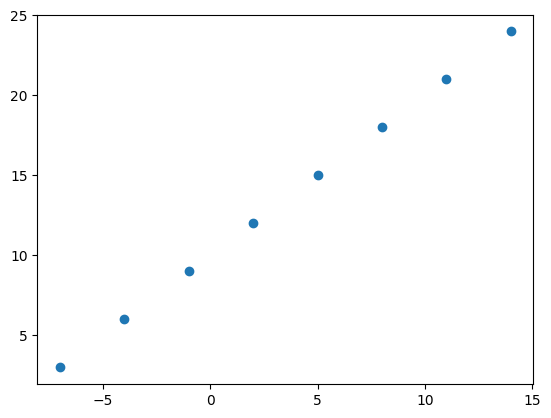

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualiza it
plt.scatter(X,y)

## Input and Output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
# Turn our NumPy arrays into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function wich tells our model how wrong it is) and the optimizer (tells our model how to imporve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - lettinf the model try to find patterns between X & y (features and labels)

In [6]:
# Set random seed
tf.random.set_seed(42)


# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss= tf.keras.losses.mae, # mae is short for 'mean absolute error'
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for 'stochastic gradient descent'
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 10.5315 - mae: 10.5315
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 10.3990 - mae: 10.3990
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 10.2665 - mae: 10.2665
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 10.1340 - mae: 10.1340
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 10.0015 - mae: 10.0015
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 9.8690 - mae: 9.8690
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 9.7365 - mae: 9.7365
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 9.6040 - mae: 9.6040
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 9.4715 - mae: 9.4715
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 9.3390 - mae: 9.3390
Epoch 11/100
1/1 [==============================] - 0s 10ms/s

In [7]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 161ms/step


array([[30.10596]], dtype=float32)

In [9]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 57ms/step


array([[30.10596]], dtype=float32)

## Improving our model
We can imporve our model by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (all called neurons) within each of hidden layers, change the activation function of each layer
2. **Compiling the model** - Here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting the model** - Here we might fit a model more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
# Let's rebuild the model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss= tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)


# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [11]:
# Lets see if our model's prediction has improved

model.predict([17.0])

1/1 [==============================] - 0s 128ms/step


array([[29.573563]], dtype=float32)

In [13]:
# Make another change to improve the model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])



# 2. Compile the model
model.compile(
    loss = "mae",
    optimizer= tf.keras.optimizers.SGD(),
    metrics=["mae"]
)


# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.7683 - mae: 14.7683
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 14.2638 - mae: 14.2638
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 13.7854 - mae: 13.7854
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 13.3196 - mae: 13.3196
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8519 - mae: 12.8519
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 12.3815 - mae: 12.3815
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.9083 - mae: 11.9083
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 11.4265 - mae: 11.4265
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9349 - mae: 10.9349
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 10.4230 - mae: 10.4230
Epoch 11/100
1/1 [==============================] -

In [14]:
# Model's prediction

model.predict([17.0])

1/1 [==============================] - 0s 122ms/step


array([[31.889294]], dtype=float32)

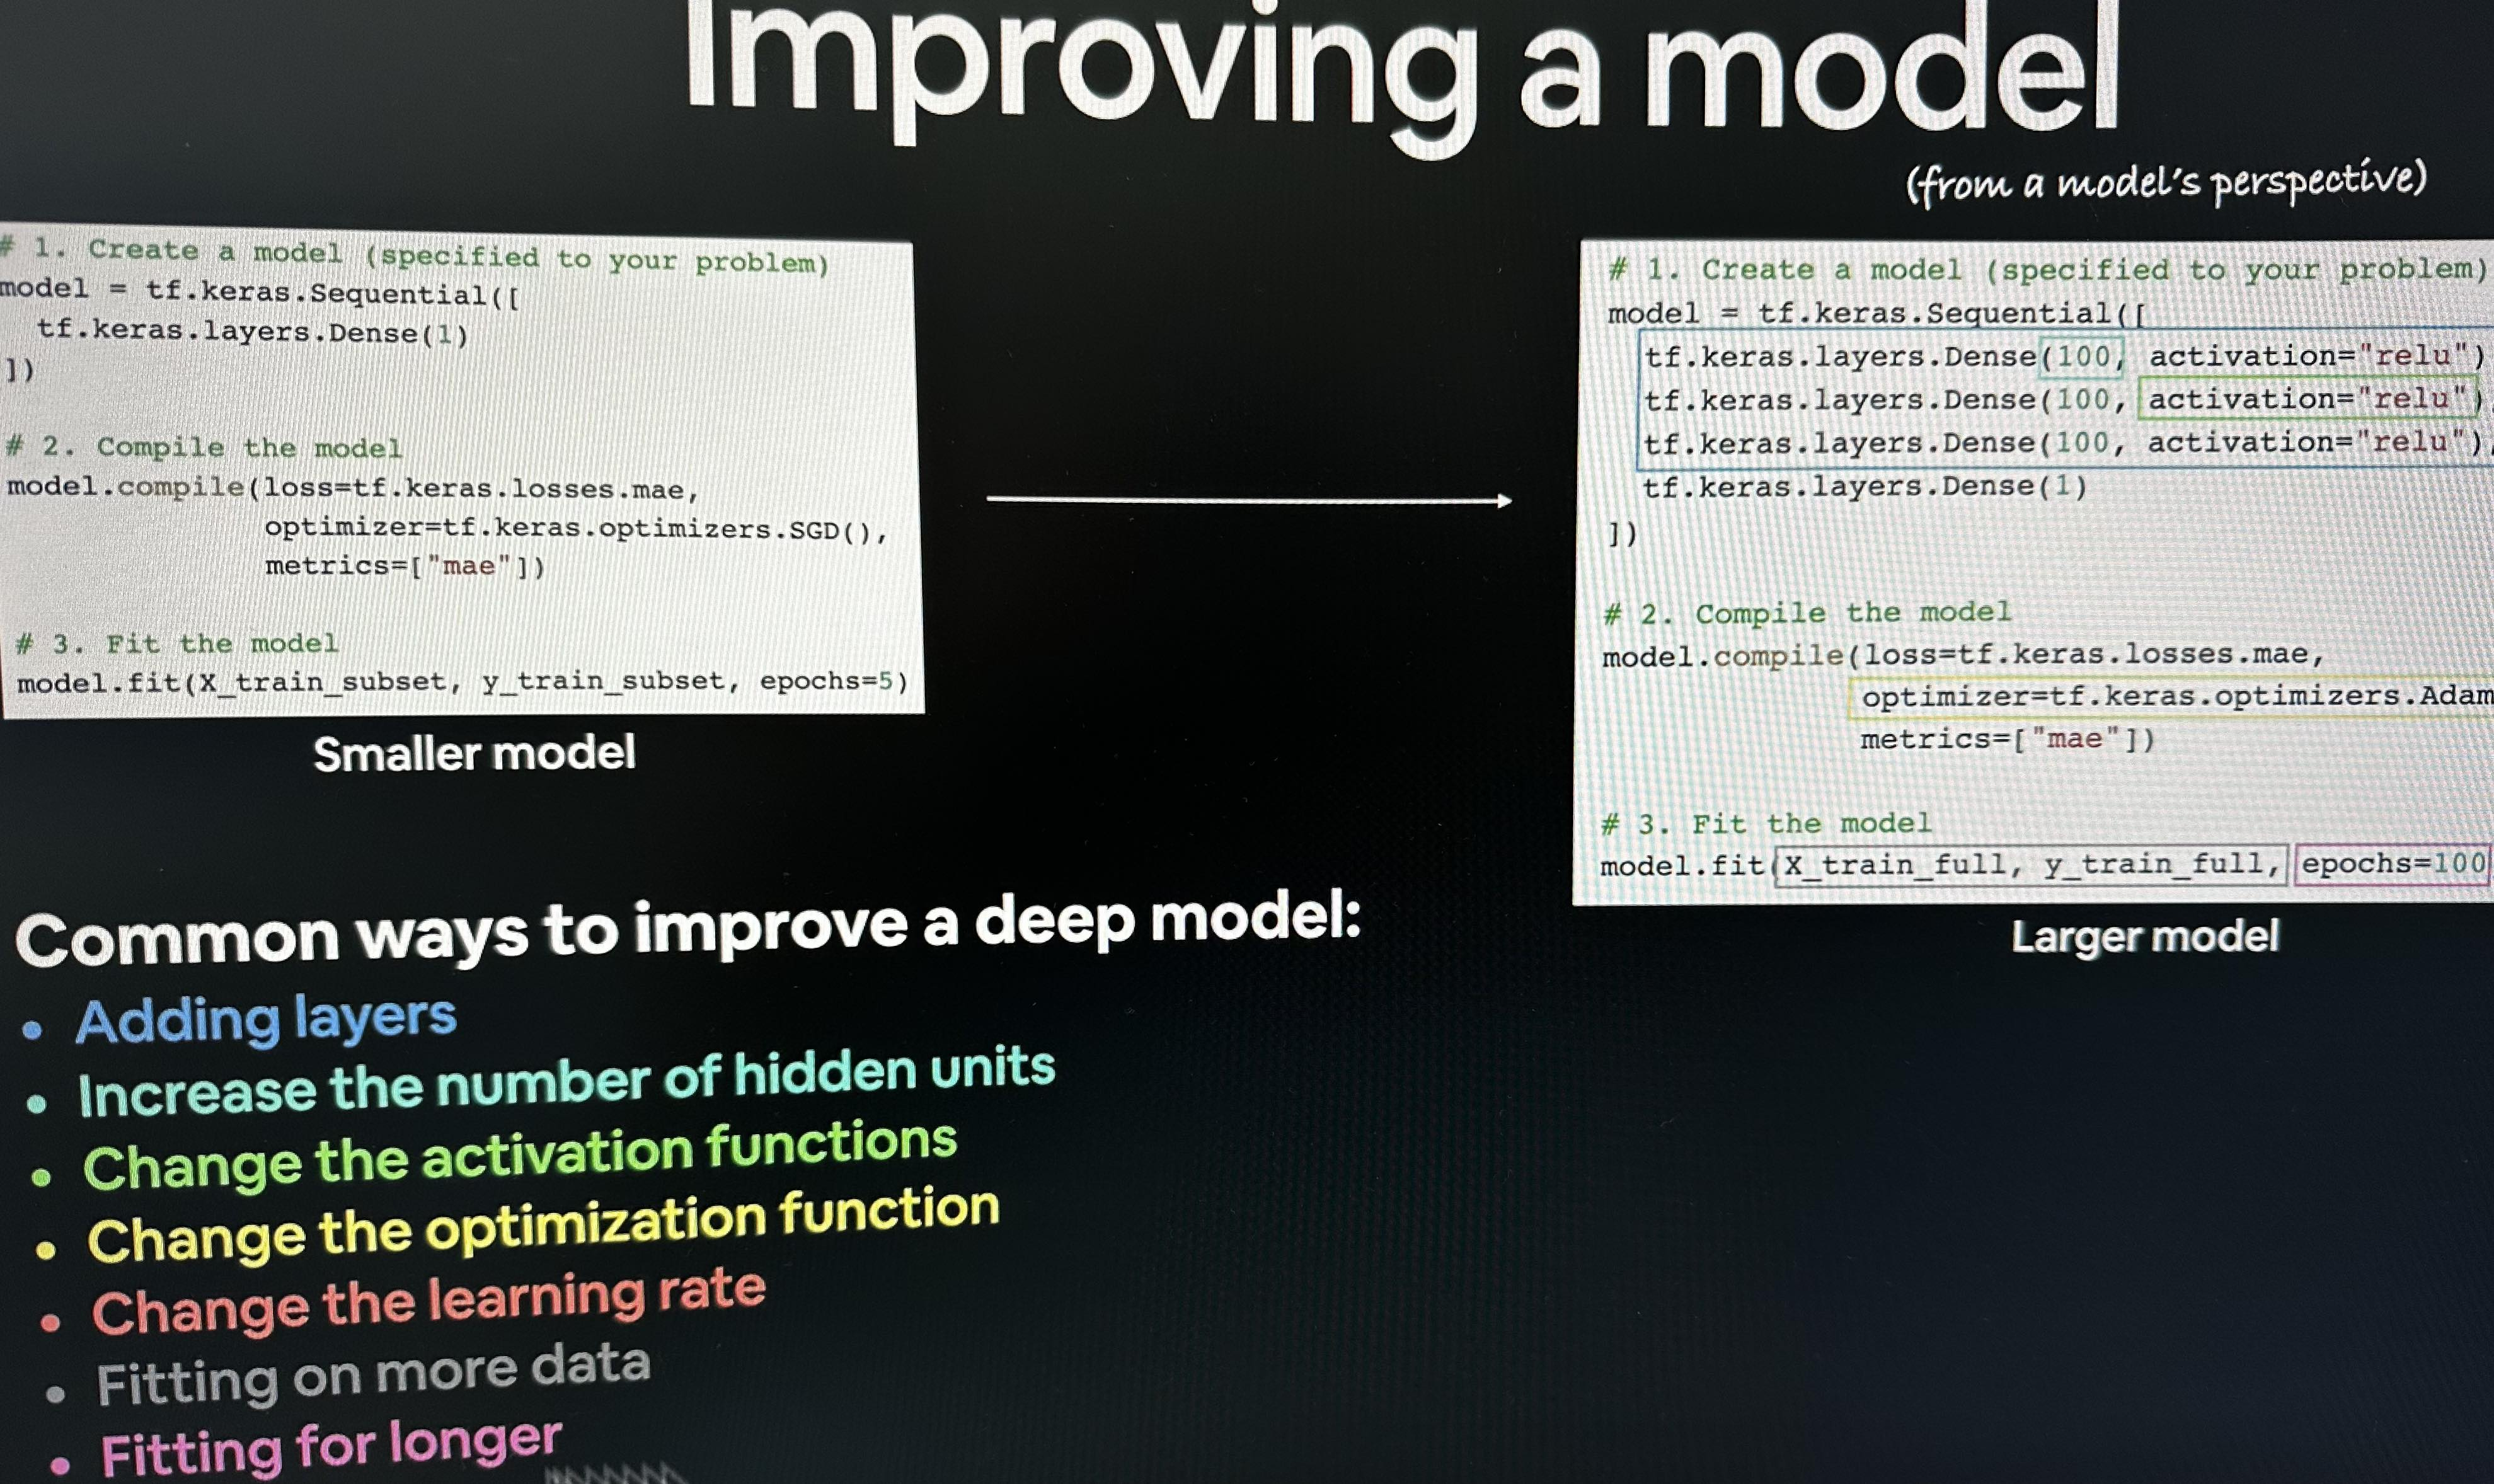